### Universal Approximation Theorem

The **Universal Approximation Theorem** is a fundamental result in neural network theory. It states that a feedforward neural network with at least one hidden layer containing a finite number of neurons, and with appropriate activation functions (such as sigmoid, ReLU, or tanh), can approximate any continuous function on a compact subset of \\({R}^n\\) to any desired degree of accuracy, given enough neurons in the hidden layer.

#### Key Points

- The theorem applies to **feedforward neural networks** (also called multilayer perceptrons).
- The network must have at least **one hidden layer**.
- The activation function must be **non-constant, bounded, and continuous** (sigmoid and tanh are common examples; later results also include ReLU).
- The theorem guarantees the **existence** of such a network, but does not say how to find the right parameters or how many neurons are needed in practice.

#### Mathematical Statement

Let \\( f: {R}^n --> {R} \\) be a continuous function on a compact subset \\( K \subset {R}^n \\). For any \\( \epsilon > 0 \\), there exists a neural network \( F \) with one hidden layer such that

$$
|f(x) - F(x)| < (\epsilon) \quad \text{for all } x \in K
$$

The universal approximation theorem states that neural networks can be used to approximate any continuous
 function to arbitrary accuracy if no constraint is placed on the width and depth of the hidden layers

- $u$: This represents the input function or input signal. It is the function that the operator $G$ acts upon. In the context of the DeepONet architecture, the network does not take the entire function u as input directly. Instead, it uses the values of the input function u evaluated at a fixed number of specific locations called "sensors" {x1, x2, ..., xm}.\
These sensor locations are the same for all input functions u in the training dataset.
The input function u is considered to belong to a set $V$, which is a compact set in the space of continuous functions $C(K1)$, where $K1$ is a compact set in a Banach space X.
\
- $G$: This symbol represents a nonlinear continuous operator. An operator is a mathematical mapping that takes an input function and transforms it into an output function. \

- $G(u)$: This notation refers to the output function that results from applying the operator G to the input function $u$ . In the examples discussed in the paper, $G(u)$ is the solution function $(s(x)$ or $s(x, t))$ of a differential equation (like an ODE or PDE) when $u$ is the input or source term for that equation. The operator $G$ maps a compact set $V$ of input functions (in $C(K1)$) to a set of output functions (in $C(K2)$, where $K2$ is a compact set in Rd). \

- $y$: This represents a specific location or point in the domain of the output function $G(u)$. It is the location where the value of the output function $G(u)$ is desired. \

- $G(u)(y)$: This is the real number value that represents the output function $G(u)$ evaluated at the specific location $y$. This is the target output that the DeepONet network is trained to predict, given the sensed input $u(x_i)$ and the location $y$.

# Universal Approximation Theorem for Operator

1. **The Core Idea**: The theorem states that a neural network with a specific structure can accurately approximate any nonlinear continuous operator. An operator $G$ is a mathematical mapping that takes an entire function $u$ as input and outputs another function $G(u)$.

2. **What is Approximated**: The theorem focuses on approximating the value of the output function $G(u)$ at a specific location $y$, denoted as $G(u)(y)$. This value $G(u)(y)$ is a real number.

3. **The Inputs to the Approximating Network**: To approximate $G(u)(y)$, the network needs two types of information as input:
* Information about the input function $u$. Since a network cannot directly process an entire continuous function, the theorem's structure (and the DeepONet architecture it inspires) uses the values of the input function $u$ evaluated at a fixed number of specific locations, called "sensors" {x1, x2, ..., xm} . These m sensor locations {x1, ..., xm} are the same for all input functions $u$ considered.
* The location $y$ where the output value $G(u)(y)$ is desired. This location $y$ can be a vector in ${R^d}$.

4. **The Network Structure**: describes a specific architecture (given by Eq. 1) that can achieve this approximation. This structure has two main parts that are combined:
* A "*branch*" part that processes the sensor values of the input function. This part takes the vector of values [u(x1), u(x2), ..., u(xm)] as input.
* A "*trunk*" part that processes the output location y. This part takes the vector y as input.
* Both parts utilize an activation function σ. The theorem requires $σ$ to be a continuous non-polynomial function. Many common activation functions used in neural networks, like sigmoid, tanh, and ReLU, satisfy this condition.
* The overall output G(u)(y) is approximated by combining the outputs of the branch and trunk parts, typically through summation or multiplication of corresponding components. The formula in Theorem 1 (Eq. 1) shows a sum of terms, where each term is a product of an output from the branch processing $u$ $(x_j)$ and an output from the trunk processing $y$.

5. **The Guarantee**: The theorem guarantees that for any desired level of accuracy (represented by ε > 0), you can find a network of this structure (with a sufficient number of neurons, represented by integers n, p, m, and specific weights and biases) such that the network's output is arbitrarily close (within ε) to the true value $G(u)(y)$ for all possible input functions $u$ within a specified set $V$ and all possible output locations $y$ within a specified set $K2$.

6. **Conditions for the Theorem to Hold**: The theorem holds under the assumption that:
* $σ$ is a continuous non-polynomial function.
* The space where input functions are defined (X) is a Banach space.
* The sets $K1$ (where $u$ is defined and sensors are located) and $K2$ (where $y$ is located) are compact.
* The set of input functions $V$ considered is a compact set in the space of continuous functions $C(K1)$.
* The operator $G$ is nonlinear and continuous
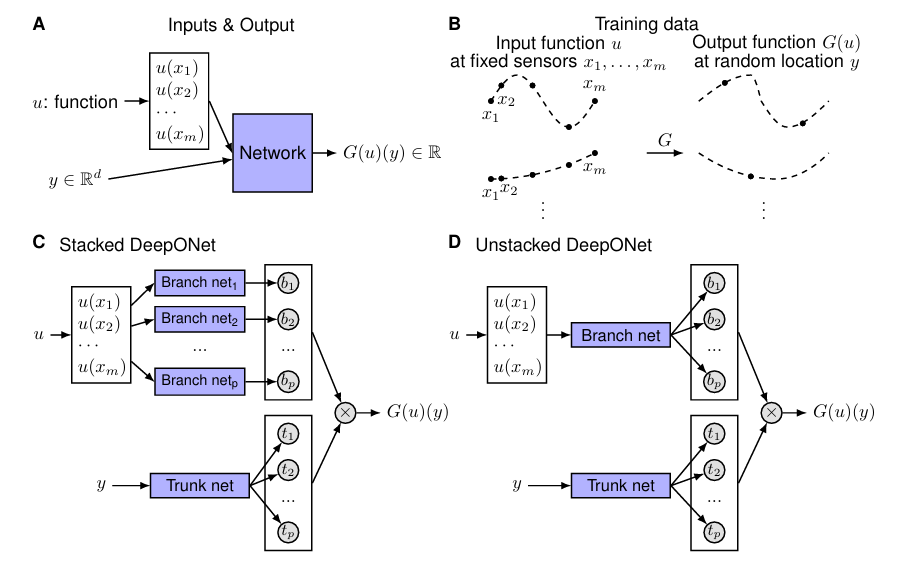

$$
\left|
G(u)(y) - \sum_{k=1}^{p} \sum_{i=1}^{n} c_i^k \, \sigma \left( \sum_{j=1}^{m} \xi_{ij}^k u(x_j) + \theta_i^k \right) \sigma(w_k \cdot y + \zeta_k)
\right| < \epsilon
$$

where the inner sum (branch) is:

$$
\sum_{j=1}^{m} \xi_{ij}^k u(x_j) + \theta_i^k
$$

and the outer function (trunk) is:

$$
\sigma(w_k \cdot y + \zeta_k)
$$

**Parameter definitions:**

- $G(u)(y)$: The target function evaluated at $y$ with input $u$.
- $p$: Number of terms in the outer sum (number of "trunks").
- $n$: Number of terms in the inner sum (number of "branches" per trunk).
- $c_i^k$: Coefficient for the $i$-th branch in the $k$-th trunk.
- $\sigma(\cdot)$: Activation function (e.g., sigmoid, tanh, ReLU).
- $m$: Number of input points $x_j$.
- $\xi_{ij}^k$: Weight for the $j$-th input in the $i$-th branch of the $k$-th trunk.
- $u(x_j)$: Value of the input function $u$ at point $x_j$.
- $\theta_i^k$: Bias for the $i$-th branch in the $k$-th trunk.
- $w_k$: Weight vector for the $k$-th trunk.
- $y$: Output variable.
- $\zeta_k$: Bias for the $k$-th trunk.
- $\epsilon$: Desired approximation accuracy.

### Why DeepONet is Needed

1. **The Universal Approximation Theorem for Operators has Limitations in Practice:**  
   While it is known that neural networks can accurately approximate any nonlinear continuous operator, the Universal Approximation Theorem (specifically Theorem 1) only guarantees a small approximation error for a sufficiently large network. It does not consider the important optimization error and generalization error.

2. **Optimization and Generalization Errors are Crucial:**  
   These other error types (optimization and generalization errors) are equally important and often dominant contributions to the total error in practice. The theorem provides a theoretical basis but does not inform how to learn operators effectively. Networks that are practically useful must be easy to train (small optimization error) and generalize well to unseen data (small generalization error).

3. **Generic Architectures are Insufficient for Operators:**  
   Similar to how generic fully-connected neural networks (FNNs) perform poorly compared to specialized architectures like Convolutional Neural Networks (CNNs) for tasks like image classification, despite FNNs being universal function approximators, a specific architecture is needed for effectively learning operators. Directly using classical networks like FNNs by concatenating the inputs (sensed function values and output location) doesn't leverage any specific structure of the problem.

4. **Need for a Specific Architecture to Reduce Generalization Error:**  
   To realize the universal approximation theorem for operators in practice, and to learn operators accurately and efficiently from data, a specific network architecture is required that minimizes the total error, particularly by achieving smaller generalization error.

Therefore, **DeepONet** is proposed as a specific network architecture designed to address these practical challenges. It aims to learn operators accurately and efficiently from a relatively small dataset. Its design, consisting of two sub-networks – a branch net for the input function values at sensors and a trunk net for the output locations – is intended to significantly reduce the generalization error compared to generic fully-connected networks. This specific architecture provides an inductive bias consistent with the problem structure (the output \( G(u)(y) \) depends independently on the input function \( u \) and the output location \( y \)).

In [9]:
import jax
import jax.numpy as jnp
from jax.scipy.integrate import trapezoid # For numerical integration
import matplotlib.pyplot as plt
from typing import Tuple, Callable

In [10]:
key = jax.random.key(0)

###  Defining the Gaussian Random Field (GRF) for u(x)
We'll generate our input functions u(x) from a GRF. This requires defining a kernel function (we'll use RBF) and a way to sample from the GRF.

The Radial Basis Function (RBF) kernel, or squared exponential kernel, is defined as:
$$
k(x_1, x_2) =  \exp\left(-\frac{\|x_1 - x_2\|^2}{2l^2}\right)
$$

$l$ is the length-scale.

In [11]:
def rbf_kernel(x1: jnp.ndarray, x2: jnp.ndarray, length_scale: float) -> jnp.ndarray:
  """
  Computes the RBF kernel between two sets of points.
  x1, x2: (N,D) array of N points in D dimension
  length_scale: the length scale of the kernel
  Returns: (N, M) kernel matrix
  """
  x1 = jnp.atleast_2d(x1)
  x2 = jnp.atleast_2d(x2)

  # COmpute the squared Eucledian distance
  diff = x1[:, None, :] - x2[None, :, :] #(N,M,D)
  sq_dist = jnp.sum(diff**2, axis=-1) #(N,M)

  return jnp.exp(-0.5 * sq_dist / length_scale**2)

def gram_matrix(kernel_fn: Callable, x: jnp.ndarray) -> jnp.ndarray:
  """Computes the gram matrix(x,x) for a given kernel and points x"""
  return kernel_fn(x, x)


### Sampling from GRF

To sample a function u(x) from G(0, k(x,x')) at points x_eval_pts, we sample from a multivariate Normal distribution: u ~ N(0, K), where K is the Gram matrix k(x_eval_pts, x_eval_pts).

In [22]:
def sample_grf(key: jax.random.key, kernel_fn: Callable, eval_pts: jnp.ndarray, num_samples: int, jitter: float = 1e-6) -> jnp.ndarray:
  """
  Samples the function from a GRF
  kernel_fn: Callable that takes (x1, x2) and returns a kernel matrix
  eval_pts: (N-eval, D) array of points at which to evaluate the GRF
  jitter: small value to add to diagonal for numerical stability
  Returns: (num_samples, N_eval) array of function samples
  """
  K = gram_matrix(kernel_fn, eval_pts)
  K_stable = K + jitter * jnp.eye(K.shape[0])

  # Cholesky decomposition: L L^T = K
  L = jnp.linalg.cholesky(K_stable)

  #Standard normal smaples
  z = jax.random.normal(key, shape = (K.shape[1], num_samples)) # Shape(N_eval, num_samples)

  # u = L @ z
  samples = jnp.dot(L, z).T # Shape (num-samples, N_eval)
  return samples


In [23]:
# domain for u(x) and y
domain_start = 0.0
domain_end = 1.0

# Fine grid for defining u(x)
num_fine_pts = 201
x_fine_grid = jnp.linspace(domain_start, domain_start, num_fine_pts).reshape(-1,1)

# sensor locations for the branch net(fixed for all samples)
num_sensors = 50
x_sensors = jnp.linspace(domain_start, domain_end, num_sensors).reshape(-1, 1)

#Parameter for GRF
grf_length_scale = 0.2
partial_rbf_kernel = lambda x1, x2: rbf_kernel(x1, x2, length_scale=grf_length_scale)

### The "Solver": Numerical Integration for Antiderivative
For our operator $ G(u)(y) = \int_0^y u(t) dt $, the solver is numerical integration. We'll use JAX's trapezoid rule.

In [41]:


def compute_antiderivative(u_on_fine_grid: jnp.ndarray,
                                    x_fine: jnp.ndarray,
                                    y_loc: float,
                                    domain_start_val: float, # Pass domain_start explicitly
                                    domain_end_val: float    # Pass domain_end explicitly
                                   ) -> float:
    x_fine_flat = x_fine.flatten()
    mask = x_fine_flat <= y_loc

    # Condition 1: y_loc is before or at the first grid point, or no points masked
    # (implies integral is 0)
    cond1 = jnp.logical_or(jnp.logical_not(jnp.any(mask)), y_loc == domain_start_val)

    # Condition 2: Only one point masked (the start point) and y_loc is that start point
    # (implies integral is 0)
    # Note: x_fine_flat[mask] can be tricky with vmap if mask is all False.
    # We need to handle the case where jnp.sum(mask) is 0 or 1 carefully.

    # Let's define branches for jax.lax.cond
    def case_zero_integral():
        return 0.0

    def case_compute_integral():
        # This branch executes if cond1 is false.
        # Now handle the logic for actual integration.

        # If only one point is masked (the start point), and y_loc is that start point
        # This check is tricky inside a jax.lax.cond if it depends on masked indexing.
        # A simpler way: if y_loc is exactly domain_start_val, it's already covered by cond1.
        # If y_loc is slightly > domain_start_val but only one point is masked,
        # it means y_loc is between x_fine_flat[0] and x_fine_flat[1].

        u_masked = u_on_fine_grid[mask]
        x_masked = x_fine_flat[mask]

        # If y_loc is not exactly on the grid and is within the domain, interpolate.
        # We need to be careful with indexing x_masked[-1] if x_masked could be empty.
        # However, if we are in this branch, jnp.any(mask) is true.

        is_y_loc_between_grid_and_end = jnp.logical_and(y_loc > x_masked[-1], y_loc < domain_end_val)

        def add_interpolated_y_loc():
            u_at_y_loc_interp = jnp.interp(y_loc, x_fine_flat, u_on_fine_grid)
            x_to_integrate_aug = jnp.concatenate([x_masked, jnp.array([y_loc])])
            u_to_integrate_aug = jnp.concatenate([u_masked, jnp.array([u_at_y_loc_interp])])
            return x_to_integrate_aug, u_to_integrate_aug

        def use_masked_points():
            return x_masked, u_masked

        x_for_integration, u_for_integration = jax.lax.cond(
            is_y_loc_between_grid_and_end,
            add_interpolated_y_loc,
            use_masked_points
        )

        # Ensure at least two points for trapezoid rule
        # If fewer than 2 points, the integral is approximately 0 or u[0]*x[0] if only one point.
        # This part is also tricky for jax.lax.cond if shapes change.
        # A common strategy is to ensure computations can run even if the result is trivial.

        def integrate_normally():
            return trapezoid(y=u_for_integration, x=x_for_integration)

        def handle_few_points():
            # If only one point, approx integral (e.g. u[0]*x[0] if x[0] is y_loc)
            # This is a simplification. A more robust small integral might be needed.
            # If y_loc is domain_start, it's 0. If slightly after, and only x[0] is masked,
            # and y_loc is x[0], then it's 0.
            # If y_loc is > x[0] but < x[1], and we only have x[0], u[0]
            # then the interpolation step should have handled adding y_loc.
            # So, if x_for_integration has 1 point, it means y_loc was likely the first point.
            # Or, after interpolation, we still only have one point (e.g. y_loc = x_masked[0]).
            return jax.lax.cond(x_for_integration.shape[0] == 1,
                                lambda: u_for_integration[0] * (x_for_integration[0] - domain_start_val), # Approx for small segment
                                lambda: 0.0) # Default to 0 if no points or logic error

        integral_val = jax.lax.cond(
            x_for_integration.shape[0] < 2,
            handle_few_points,
            integrate_normally
        )
        return integral_val

    # Main conditional execution
    result = jax.lax.cond(
        cond1,
        case_zero_integral,
        case_compute_integral
    )
    return result

# Update the vmapped functions
vmap_compute_antiderivative_single_u= jax.vmap(
    compute_antiderivative, in_axes=(None, None, 0, None, None), out_axes=0
)

vmap_compute_antiderivative_batch_u_y = jax.vmap(
    vmap_compute_antiderivative_single_u, in_axes=(0, None, 0, None, None), out_axes=0
)

### Main data generation function
This function will orchestrate the sampling of $u$, evaluation at sensor points, generation of $y$ locations, and computation of $G(u)(y)$.

In [42]:
def generate_data_antiderivative(key: jax.random.key, num_u_samples: int, num_y_per_u: int,
                                 x_fine_grid: jnp.ndarray, x_sensors: jnp.ndarray, grf_kernel_fn:Callable,
                                 domain_start_val: float, domain_end_val: float
                                 ) -> Tuple[jnp.ndarray, jnp.ndarray, jnp.ndarray]:

  """
    Generates data for DeepONet training for the antiderivative operator.

    Returns:
        branch_inputs: (num_u_samples * num_y_per_u, N_sensors)
        trunk_inputs:  (num_u_samples * num_y_per_u, 1)  (y locations)
        outputs:       (num_u_samples * num_y_per_u, 1)  (G(u)(y) values)
    """
  key_grf, key_y_locs = jax.random.split(key)

  # 1. Sample u(x) functions on the fine grid
  u_samples_fine = sample_grf(key_grf, grf_kernel_fn, x_fine_grid, num_u_samples)
  # u_samples_fine shape: (num_u_samples, N_fine)

  # 2. Evaluate/Interpolate u(x) at sensor locations for branch input
  # jax.vmap jnp.interp oover the samples of u
  # xp is x_fine_grid.flatten(), fp is each row of u_samples_fine, x is x_sensors.flatten()

  vmap_interp = jax.vmap(jnp.interp, in_axes=(None, None, 0), out_axes=0)

  branch_inputs_raw = vmap_interp(x_sensors.flatten(), x_fine_grid.flatten(), u_samples_fine)

  # 3. Generate y locations for trunk input
  # For each u_sample, generate num_y_per_u random y locations

  y_locs_batch = jax.random.uniform(key_y_locs, shape=(num_u_samples, num_y_per_u), minval=domain_start, maxval=domain_end)
  # y_locs_batch shape: (num_u_samples, num_y_per_u)

  # 4. Compute G(u)(y) - the antiderivative
  # We need to call vmap_compute_antiderivative_single_u for each u_sample_fine
  # with its corresponding set of y_locs from y_locs_batch.

  # outputs_raw shape: (num_u_samples, num_y_per_u)
  outputs_raw = vmap_compute_antiderivative_batch_u_y(u_samples_fine, x_fine_grid, y_locs_batch, domain_start_val, domain_end_val)

  # 5. Repeat inputs to match the structure (num_u_samples * num_y_per_u, ...)
  # Each of the num_u_samples branch inputs needs to be repeated num_y_per_u times
  branch_inputs = jnp.repeat(branch_inputs_raw, num_y_per_u, axis=0)

  # y_locs_batch needs to be flattened and reshaped
  trunk_inputs = y_locs_batch.reshape(-1, 1)

  # outputs_raw needs to be flattened and reshaped
  outputs = outputs_raw.reshape(-1, 1)

  return branch_inputs, trunk_inputs, outputs


### generate and Inspecting data

In [43]:

# Data generation parameters
num_u_functions = 100  # Number of different u(x) functions to generate
num_y_evals_per_u = 20 # For each u(x), how many y locations to evaluate G(u)(y)

key, data_gen_key = jax.random.split(key)

branch_data, trunk_data, output_data = generate_data_antiderivative(
    data_gen_key,
    num_u_functions,
    num_y_evals_per_u,
    x_fine_grid,
    x_sensors,
    partial_rbf_kernel,
    domain_start,
    domain_end
)

print("Shapes of generated data:")
print(f"Branch inputs (u_sensors): {branch_data.shape}")
print(f"Trunk inputs (y_locs):   {trunk_data.shape}")
print(f"Outputs (G(u)(y)):       {output_data.shape}")

# Expected total samples: num_u_functions * num_y_evals_per_u
total_samples = num_u_functions * num_y_evals_per_u
assert branch_data.shape[0] == total_samples
assert trunk_data.shape[0] == total_samples
assert output_data.shape[0] == total_samples
assert branch_data.shape[1] == num_sensors
assert trunk_data.shape[1] == 1 # y is scalar
assert output_data.shape[1] == 1 # G(u)(y) is scalar

NonConcreteBooleanIndexError: Array boolean indices must be concrete; got ShapedArray(bool[201])

See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.NonConcreteBooleanIndexError

SyntaxError: invalid syntax (<ipython-input-44-2830201818>, line 1)